PRINCIPAL COMPONENT ANALYSIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
data=pd.read_csv(r"C:\Users\new\Dropbox\My PC (LAPTOP-VOB8LHM1)\Downloads\pca_dataset.csv")
print(data)
print(f"Shape of data: {data.shape}")

    brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
295     J  34044  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  24069  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  34039  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  14044  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  14045  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 9 columns]
Shape of data: (300, 9)


In [3]:
# checking for null values
data.isnull().any()

brand     False
id        False
mois      False
prot      False
fat       False
ash       False
sodium    False
carb      False
cal       False
dtype: bool

In [4]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
print(x)
print(f"Shape of data: {x.shape}")


[[1.4069e+04 2.7820e+01 2.1430e+01 ... 5.1100e+00 1.7700e+00 7.7000e-01]
 [1.4053e+04 2.8490e+01 2.1260e+01 ... 5.3400e+00 1.7900e+00 1.0200e+00]
 [1.4025e+04 2.8350e+01 1.9990e+01 ... 5.0800e+00 1.6300e+00 8.0000e-01]
 ...
 [3.4039e+04 4.4550e+01 1.1010e+01 ... 2.4300e+00 6.4000e-01 2.5980e+01]
 [1.4044e+04 4.7600e+01 1.0430e+01 ... 2.3200e+00 5.6000e-01 2.4470e+01]
 [1.4045e+04 4.6840e+01 9.9100e+00 ... 2.2700e+00 5.7000e-01 2.5480e+01]]
Shape of data: (300, 7)


In [5]:
print(y)
y.shape

[4.93 4.84 4.95 4.74 4.67 4.67 4.63 4.72 4.93 4.95 4.98 4.97 4.91 4.72
 4.67 4.77 4.47 4.46 4.53 4.66 5.08 4.97 4.68 4.7  4.56 4.8  4.91 4.79
 4.78 3.33 3.05 3.44 3.27 3.21 3.32 3.32 3.35 2.98 3.02 3.31 3.36 3.18
 3.31 2.82 2.76 2.96 3.36 3.26 2.99 3.3  3.35 3.36 3.2  3.19 2.94 3.12
 3.17 3.21 3.25 3.23 3.   2.78 2.96 2.87 3.09 2.91 2.64 2.87 2.73 2.61
 2.51 2.91 3.01 2.99 3.02 2.98 2.86 2.58 3.05 2.91 2.58 2.83 2.67 2.78
 3.18 2.66 2.94 3.2  3.28 2.99 2.91 3.02 3.12 2.98 2.96 2.78 3.02 3.03
 3.02 2.9  2.95 2.95 2.91 2.99 2.95 2.94 2.97 2.99 2.95 2.88 3.23 2.82
 2.93 2.94 3.24 3.26 3.22 3.2  2.58 3.38 3.33 3.33 2.59 3.31 2.58 3.23
 3.19 3.27 3.26 3.08 3.22 3.52 3.6  3.42 3.12 3.1  3.42 3.3  3.21 3.46
 3.4  3.54 3.57 3.49 2.85 3.08 3.26 3.74 3.5  3.46 3.76 3.75 3.47 3.6
 3.37 3.47 3.53 3.7  3.52 3.75 3.5  3.72 3.71 3.78 3.49 3.96 3.43 3.36
 3.35 3.59 3.53 3.67 3.62 3.65 3.73 3.77 3.4  3.59 3.56 3.39 3.57 3.8
 3.65 3.6  3.61 3.64 3.63 3.52 3.51 3.56 3.23 3.89 3.61 3.57 3.6  3.59
 3.48 3.

(300,)

In [6]:
x_stand=StandardScaler().fit_transform(x)
x_stand

array([[-0.97421164, -1.37181459,  1.25418127, ...,  1.9538938 ,
         2.97668662, -1.22751105],
       [-0.97651337, -1.30156227,  1.22771661, ...,  2.13533826,
         3.03077869, -1.21362189],
       [-0.98054139, -1.31624186,  1.03000998, ...,  1.93022714,
         2.59804213, -1.22584435],
       ...,
       [ 1.89863118,  0.3823963 , -0.36794707, ..., -0.16032853,
        -0.07951534,  0.1730719 ],
       [-0.97780809,  0.70220164, -0.45823828, ..., -0.24710631,
        -0.29588362,  0.08918137],
       [-0.97766423,  0.62251244, -0.53918903, ..., -0.28655076,
        -0.26883759,  0.14529358]])

#Eigen Vectors ANd Values
#The Eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.

In [7]:
y.shape

(300,)

In [8]:
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)
print('Covariance matrix \n')
cov_mat= np.cov(x_stand, rowvar=False)
cov_mat


Covariance matrix 



array([[ 1.00334448,  0.03270407, -0.07674126, -0.00487631, -0.03418551,
        -0.01520677,  0.0150162 ],
       [ 0.03270407,  1.00334448,  0.36145252, -0.17189118,  0.26644367,
        -0.10262097, -0.59378092],
       [-0.07674126,  0.36145252,  1.00334448,  0.49966723,  0.82659903,
         0.43056473, -0.85639691],
       [-0.00487631, -0.17189118,  0.49966723,  1.00334448,  0.79428157,
         0.93644671, -0.64237943],
       [-0.03418551,  0.26644367,  0.82659903,  0.79428157,  1.00334448,
         0.8108249 , -0.90199502],
       [-0.01520677, -0.10262097,  0.43056473,  0.93644671,  0.8108249 ,
         1.00334448, -0.6222505 ],
       [ 0.0150162 , -0.59378092, -0.85639691, -0.64237943, -0.90199502,
        -0.6222505 ,  1.00334448]])

In [9]:
y.shape

(300,)

In [10]:
print(f"Shape of Covariance matrix: {cov_mat.shape}")

Shape of Covariance matrix: (7, 7)


In [11]:
cov_mat = np.cov(x_stand.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 1.96461940e-02  1.93374633e-02  9.93133383e-01 -1.11524793e-01
   1.69835736e-02  1.41400291e-02 -1.03422237e-04]
 [-1.47476685e-01  7.36801585e-01  4.56565529e-02  5.10347542e-01
  -2.97845360e-02  5.45402035e-02  4.11063456e-01]
 [-4.14817993e-01  2.43742142e-01 -8.34161395e-02 -7.30754327e-01
  -3.86400973e-02  3.86649279e-01  2.76703704e-01]
 [-4.18513681e-01 -4.11911597e-01  4.73713995e-02  1.46404768e-01
  -6.50152245e-01 -2.43914612e-01  3.86399341e-01]
 [-4.89661778e-01 -5.03327185e-03  6.25004821e-04 -7.58126448e-02
   5.76837208e-01 -6.47059880e-01  5.50491511e-02]
 [-4.13550396e-01 -3.91956339e-01  4.55872792e-02  3.99991583e-01
   3.79642818e-01  6.07573716e-01 -5.85742986e-04]
 [ 4.68875676e-01 -2.72053278e-01 -1.79072470e-02 -7.70100107e-02
   3.12671725e-01  1.05560304e-03  7.75968222e-01]]

Eigenvalues 
[4.01258933e+00 1.49188781e+00 1.01007079e+00 3.98920598e-01
 8.26951388e-02 2.72380749e-02 9.63188687e-06]


In [12]:
eig_vecs.shape

(7, 7)

In [13]:
eig_vals.shape

(7,)

In [16]:
#Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(type(eig_pairs))
#Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()
print("\n",eig_pairs)
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('\n\n\nEigenvalues in descending order:')
for i in eig_pairs:
     print(i[0])

<class 'list'>

 [(4.012589333118343, array([ 0.01964619, -0.14747669, -0.41481799, -0.41851368, -0.48966178,
       -0.4135504 ,  0.46887568])), (1.491887809229828, array([ 0.01933746,  0.73680159,  0.24374214, -0.4119116 , -0.00503327,
       -0.39195634, -0.27205328])), (1.0100707851735586, array([ 9.93133383e-01,  4.56565529e-02, -8.34161395e-02,  4.73713995e-02,
        6.25004821e-04,  4.55872792e-02, -1.79072470e-02])), (0.3989205981961197, array([-0.11152479,  0.51034754, -0.73075433,  0.14640477, -0.07581264,
        0.39999158, -0.07701001])), (0.08269513875024193, array([ 0.01698357, -0.02978454, -0.0386401 , -0.65015225,  0.57683721,
        0.37964282,  0.31267172])), (0.02723807488249784, array([ 0.01414003,  0.0545402 ,  0.38664928, -0.24391461, -0.64705988,
        0.60757372,  0.0010556 ])), (9.631886870688938e-06, array([-1.03422237e-04,  4.11063456e-01,  2.76703704e-01,  3.86399341e-01,
        5.50491511e-02, -5.85742986e-04,  7.75968222e-01]))]



Eigenvalues in de

Explained Variance:
After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?”
A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues.
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
tot = sum(eig_vals)
print("Sum of Eigen values:",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first three principal components each contain\n ",var_exp[0:3])
print("\n\n4. Percentage of variance the first three principal components together contain\n",sum(var_exp[0:3]))


Sum of Eigen values: 7.02341137123746


1. Variance Explained
 [57.131629076304016, 21.241640712367545, 14.38148403651876, 5.679869469554275, 1.1774212612534443, 0.3878183042793739, 0.00013713972258742817]


2. Cumulative Variance Explained
 [ 57.13162908  78.37326979  92.75475383  98.43462329  99.61204456
  99.99986286 100.        ]


3. Percentage of variance the first three principal components each contain
  [57.131629076304016, 21.241640712367545, 14.38148403651876]


4. Percentage of variance the first three principal components together contain
 92.75475382519032


Constructing the projection matrix W from the selected k eigen vector

In [18]:
# selecting first 3 principal components (k=3)
# here we are reducing the 7-dimensional feature space to a 3-dimensional feature subspace

matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1),
                      eig_pairs[2][1].reshape(7,1)))
#hstack: Stacks arrays in sequence horizontally (column wise).
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 1.96461940e-02  1.93374633e-02  9.93133383e-01]
 [-1.47476685e-01  7.36801585e-01  4.56565529e-02]
 [-4.14817993e-01  2.43742142e-01 -8.34161395e-02]
 [-4.18513681e-01 -4.11911597e-01  4.73713995e-02]
 [-4.89661778e-01 -5.03327185e-03  6.25004821e-04]
 [-4.13550396e-01 -3.91956339e-01  4.55872792e-02]
 [ 4.68875676e-01 -2.72053278e-01 -1.79072470e-02]]


In [19]:
matrix_w.shape

(7, 3)

In [20]:
Y = x_stand.dot(matrix_w)
principalDf = pd.DataFrame(data = Y, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf

,principal component 1,principal component 2,principal component 3
0,-4.251239,-2.699206,-0.845608
1,-4.309599,-2.634783,-0.845329
2,-4.040112,-2.606776,-0.843153
3,-3.811218,-2.295361,-0.853180
4,-3.849413,-2.226781,-0.874201
...,...,...,...
295,0.405789,0.380161,1.914619
296,0.271122,0.184269,0.481820
297,0.522218,0.406717,1.904720
298,0.588334,0.711859,-0.942744


In [21]:
y

array([4.93, 4.84, 4.95, 4.74, 4.67, 4.67, 4.63, 4.72, 4.93, 4.95, 4.98,
       4.97, 4.91, 4.72, 4.67, 4.77, 4.47, 4.46, 4.53, 4.66, 5.08, 4.97,
       4.68, 4.7 , 4.56, 4.8 , 4.91, 4.79, 4.78, 3.33, 3.05, 3.44, 3.27,
       3.21, 3.32, 3.32, 3.35, 2.98, 3.02, 3.31, 3.36, 3.18, 3.31, 2.82,
       2.76, 2.96, 3.36, 3.26, 2.99, 3.3 , 3.35, 3.36, 3.2 , 3.19, 2.94,
       3.12, 3.17, 3.21, 3.25, 3.23, 3.  , 2.78, 2.96, 2.87, 3.09, 2.91,
       2.64, 2.87, 2.73, 2.61, 2.51, 2.91, 3.01, 2.99, 3.02, 2.98, 2.86,
       2.58, 3.05, 2.91, 2.58, 2.83, 2.67, 2.78, 3.18, 2.66, 2.94, 3.2 ,
       3.28, 2.99, 2.91, 3.02, 3.12, 2.98, 2.96, 2.78, 3.02, 3.03, 3.02,
       2.9 , 2.95, 2.95, 2.91, 2.99, 2.95, 2.94, 2.97, 2.99, 2.95, 2.88,
       3.23, 2.82, 2.93, 2.94, 3.24, 3.26, 3.22, 3.2 , 2.58, 3.38, 3.33,
       3.33, 2.59, 3.31, 2.58, 3.23, 3.19, 3.27, 3.26, 3.08, 3.22, 3.52,
       3.6 , 3.42, 3.12, 3.1 , 3.42, 3.3 , 3.21, 3.46, 3.4 , 3.54, 3.57,
       3.49, 2.85, 3.08, 3.26, 3.74, 3.5 , 3.46, 3.

In [22]:
finalDf = pd.concat([principalDf,pd.DataFrame(y, columns= ['cal'])], axis= 1)
finalDf


,principal component 1,principal component 2,principal component 3,cal
0,-4.251239,-2.699206,-0.845608,4.93
1,-4.309599,-2.634783,-0.845329,4.84
2,-4.040112,-2.606776,-0.843153,4.95
3,-3.811218,-2.295361,-0.853180,4.74
4,-3.849413,-2.226781,-0.874201,4.67
...,...,...,...,...
295,0.405789,0.380161,1.914619,2.91
296,0.271122,0.184269,0.481820,3.10
297,0.522218,0.406717,1.904720,2.92
298,0.588334,0.711859,-0.942744,2.76


In [25]:
finalDf.shape

(300, 4)

Prediction without PCA

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
data = finaldf.values
x,y = data[:,:-1], data[:,-1]
 # splitting in the ration 70:30
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) 

In [32]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = regr.predict(x_test)

In [35]:
print('R2 Score:',r2_score(y_test, y_pred))

R2 Score: 0.9616622694434492


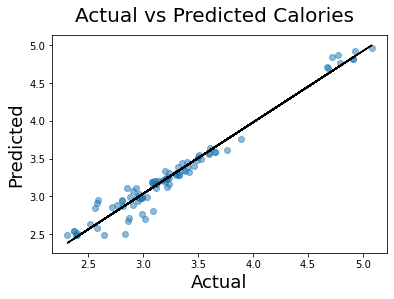

In [36]:
fig = plt.figure()
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='black')
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Actual vs Predicted Calories', fontsize = 20)    # Plot heading 
plt.xlabel('Actual', fontsize = 18)                         # X-label
plt.ylabel('Predicted', fontsize = 18)                      # y-label
plt.show()

Prediction with PCA

In [47]:
A = pd.read_csv(r"C:\Users\new\Dropbox\My PC (LAPTOP-VOB8LHM1)\Downloads\pca_dataset.csv")
print(A)

    brand     id   mois   prot    fat   ash  sodium   carb   cal
0       A  14069  27.82  21.43  44.87  5.11    1.77   0.77  4.93
1       A  14053  28.49  21.26  43.89  5.34    1.79   1.02  4.84
2       A  14025  28.35  19.99  45.78  5.08    1.63   0.80  4.95
3       A  14016  30.55  20.15  43.13  4.79    1.61   1.38  4.74
4       A  14005  30.49  21.28  41.65  4.82    1.64   1.76  4.67
..    ...    ...    ...    ...    ...   ...     ...    ...   ...
295     J  34044  44.91  11.07  17.00  2.49    0.66  25.36  2.91
296     J  24069  43.15  11.79  18.46  2.43    0.67  24.17  3.10
297     J  34039  44.55  11.01  16.03  2.43    0.64  25.98  2.92
298     J  14044  47.60  10.43  15.18  2.32    0.56  24.47  2.76
299     J  14045  46.84   9.91  15.50  2.27    0.57  25.48  2.81

[300 rows x 9 columns]


In [50]:
x=A.iloc[:,1:-1].values
y=A.iloc[:,-1].values
# splitting in the ration 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)  

In [51]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = regr.predict(x_test)

In [54]:
print('R2 Score (with using PCA):',r2_score(y_test, y_pred))

R2 Score (with using PCA): 0.999725489843331


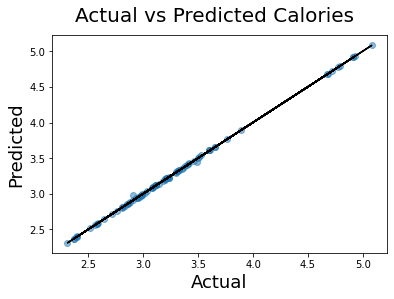

In [55]:
fig = plt.figure()
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b, color='black')
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('Actual vs Predicted Calories', fontsize = 20)    # Plot heading 
plt.xlabel('Actual', fontsize = 18)                         # X-label
plt.ylabel('Predicted', fontsize = 18)                      # y-label
plt.show()